# Logistic Regression

## Problem Statement: Employee Attrition Prediction
Goal: Predict whether an employee will leave the company or not based on features like satisfaction level, evaluation, work hours, promotion status, etc.

This is a binary classification problem.
Target variable = left (1 if employee left, 0 if stayed)

| Step | Task                                                 |
| ---- | ---------------------------------------------------- |
| 1️⃣  | Simulate realistic dataset                           |
| 2️⃣  | Data cleaning                                        |
| 3️⃣  | EDA (Exploratory Data Analysis)                      |
| 4️⃣  | Preprocessing (scaling, encoding)                    |
| 5️⃣  | Train-test split                                     |
| 6️⃣  | Model training (Logistic Regression)                 |
| 7️⃣  | Evaluation (confusion matrix, classification report) |
| 8️⃣  | Hyperparameter tuning                                |
| 9️⃣  | Summary & when to use Logistic Regression            |


In [11]:
# Simulate a Realistic Dataset
import pandas as pd
import numpy as np

np.random.seed(42)

data = pd.DataFrame({
    'satisfaction_level': np.round(np.random.uniform(0.3, 1.0, 100), 2),
    'last_evaluation': np.round(np.random.uniform(0.4, 1.0, 100), 2),
    'number_project': np.random.randint(2, 7, 100),
    'average_monthly_hours': np.random.randint(90, 310, 100),
    'time_spend_company': np.random.randint(1, 10, 100),
    'promotion_last_5years': np.random.randint(0, 2, 100),
    'salary': np.random.choice(['low', 'medium', 'high'], 100),
    'left': np.random.randint(0, 2, 100)  # target variable
})


In [12]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,promotion_last_5years,salary,left
95,0.65,0.61,5,189,2,0,medium,0
96,0.67,0.84,3,122,9,0,medium,1
97,0.60,0.94,3,190,1,0,medium,0
98,0.32,0.93,4,112,6,1,medium,0
99,0.38,0.87,2,99,7,1,high,0


In [13]:
# Data Cleaning
print(data.isnull().sum())  # no missing values in simulated data


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64


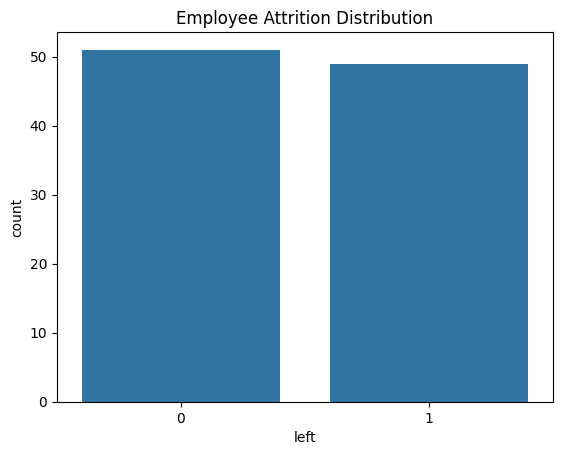

In [14]:
# EDA
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='left', data=data)
plt.title("Employee Attrition Distribution")
plt.show()


In [15]:

data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,promotion_last_5years,salary,left
0,0.56,0.42,5,275,6,1,high,0
1,0.97,0.78,4,152,5,0,high,1
2,0.81,0.59,2,279,4,1,low,1
3,0.72,0.71,5,214,2,1,high,0
4,0.41,0.94,5,239,4,0,medium,1


In [16]:
# Preprocessing
# Encode Categorical Variable
data = pd.get_dummies(data, columns=['salary'], drop_first=True).astype(int)
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,promotion_last_5years,left,salary_low,salary_medium
0,0,0,5,275,6,1,0,0,0
1,0,0,4,152,5,0,1,0,0
2,0,0,2,279,4,1,1,1,0
3,0,0,5,214,2,1,0,0,0
4,0,0,5,239,4,0,1,0,1


In [17]:
# Feature & Target Split
X = data.drop('left', axis=1)
y = data['left']


In [18]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,promotion_last_5years,left,salary_low,salary_medium
0,0,0,5,275,6,1,0,0,0
1,0,0,4,152,5,0,1,0,0
2,0,0,2,279,4,1,1,1,0
3,0,0,5,214,2,1,0,0,0
4,0,0,5,239,4,0,1,0,1


In [19]:
# Scaling (for Logistic Regression)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)



In [21]:
# Logistic Regression Training
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [22]:
# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.45
Confusion Matrix:
 [[5 4]
 [7 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.56      0.48         9
           1       0.50      0.36      0.42        11

    accuracy                           0.45        20
   macro avg       0.46      0.46      0.45        20
weighted avg       0.46      0.45      0.45        20



In [23]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'penalty': ['l1', 'l2'],       # type of regularization
    'solver': ['liblinear']        # compatible with L1/L2
}

grid = GridSearchCV(LogisticRegression(), params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))



Best Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Accuracy: 0.45


| ✅ Good When                                  | ❌ Not Good When                           |
| -------------------------------------------- | ----------------------------------------- |
| Linear relationship between features & label | Complex, non-linear patterns              |
| Need simple & interpretable model            | High accuracy needed with complex data    |
| Want probability scores (`predict_proba`)    | Data is highly imbalanced (need handling) |


| Pros                                   | Cons                                |
| -------------------------------------- | ----------------------------------- |
| Simple, fast, interpretable            | Can underfit on complex patterns    |
| Outputs probabilities                  | Assumes linearity in log-odds       |
| Works well for linearly separable data | Poor performance on non-linear data |
